# Introduction 

This notebook presents a basic EDA (Exploratory Data Analysis) of horticulture crops cultivation pattern in India over the Years 1991-92 to 2017-18.

Data: [Horticulture Data](https://www.kaggle.com/datasets/ankitkumar2635/horticulture-crops-india)

**Notes**

* The column names ending with 'A' represent area in '000 Ha.
* The column names ending with 'P' represents production in '000 MT.
* The column names ending with 'Pdy' represents productivity in MT/Ha.
* 'FAM' represents Flowers, Aromatic and Medicinal plant


### Author: Ankit Kumar

## Importing libraries

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset with year as index
my_filepath ="../input/horticulture-crops-india/Horticulture_Data.csv"
my_data = pd.read_csv(my_filepath, index_col = "Year", parse_dates = True)

# EDA

In [3]:
my_data.head()

,Fruits_A,Fruits_P,Fruits_Pdy,Veg_A,Veg_P,Veg_Pdy,FAM_A,FAM_P,FAM_Pdy,Plantation_Crops_A,Plantation_Crops_P,Plantation_Crops_Pdy,Spices_A,Spices_P,Spices_Pdy,Total_A,Total_P,Total_Pdy
Year,,,,,,,,,,,,,,,,,,
1991-92,2874,28632,9.96,5593,58532,10.47,Nil,Nil,Nil,2298,7498,3.26,2005,1900,0.95,12770,96562,7.56
2001-02,4010,43001,10.72,6156,88622,14.40,106,535,5.05,2984,9697,3.25,3220,3765,1.17,16592,145785,8.79
2002-03,3788,45203,11.93,6092,84815,13.92,70,735,10.5,2984,9697,3.25,3220,3765,1.17,16270,144380,8.87
2003-04,4661,45942,9.86,6082,88334,14.52,101,580,5.74,3102,13161,4.24,5155,5113,0.99,19208,153302,7.98
2004-05,5155,50988,9.89,6744,101246,15.01,249,818,3.29,3147,9835,3.13,3150,4001,1.27,18445,166939,9.05


**We have some non-numeric values - 'Nil', it means the respective horticulture crop was not produced during that year. So lets replace them with zero.**

In [4]:
my_data.shape

(18, 18)

In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 1991-92 to 2017-18
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fruits_A              18 non-null     int64  
 1   Fruits_P              18 non-null     int64  
 2   Fruits_Pdy            18 non-null     float64
 3   Veg_A                 18 non-null     int64  
 4   Veg_P                 18 non-null     int64  
 5   Veg_Pdy               18 non-null     float64
 6   FAM_A                 18 non-null     object 
 7   FAM_P                 18 non-null     object 
 8   FAM_Pdy               18 non-null     object 
 9   Plantation_Crops_A    18 non-null     int64  
 10  Plantation_Crops_P    18 non-null     int64  
 11  Plantation_Crops_Pdy  18 non-null     float64
 12  Spices_A              18 non-null     int64  
 13  Spices_P              18 non-null     int64  
 14  Spices_Pdy            18 non-null     float64
 15  Total_A            

In [6]:
# Replacing "Nil" values with 0 "zero" and change data type to float
my_data = my_data.replace("Nil", 0)

my_data["FAM_A"]=my_data.FAM_P.astype('float64')
my_data["FAM_P"]=my_data.FAM_P.astype('float64')
my_data["FAM_Pdy"]=my_data.FAM_P.astype('float64')
my_data.head()

,Fruits_A,Fruits_P,Fruits_Pdy,Veg_A,Veg_P,Veg_Pdy,FAM_A,FAM_P,FAM_Pdy,Plantation_Crops_A,Plantation_Crops_P,Plantation_Crops_Pdy,Spices_A,Spices_P,Spices_Pdy,Total_A,Total_P,Total_Pdy
Year,,,,,,,,,,,,,,,,,,
1991-92,2874,28632,9.96,5593,58532,10.47,0.0,0.0,0.0,2298,7498,3.26,2005,1900,0.95,12770,96562,7.56
2001-02,4010,43001,10.72,6156,88622,14.40,535.0,535.0,535.0,2984,9697,3.25,3220,3765,1.17,16592,145785,8.79
2002-03,3788,45203,11.93,6092,84815,13.92,735.0,735.0,735.0,2984,9697,3.25,3220,3765,1.17,16270,144380,8.87
2003-04,4661,45942,9.86,6082,88334,14.52,580.0,580.0,580.0,3102,13161,4.24,5155,5113,0.99,19208,153302,7.98
2004-05,5155,50988,9.89,6744,101246,15.01,818.0,818.0,818.0,3147,9835,3.13,3150,4001,1.27,18445,166939,9.05


In [7]:
my_data.dtypes

Fruits_A                  int64
Fruits_P                  int64
Fruits_Pdy              float64
Veg_A                     int64
Veg_P                     int64
Veg_Pdy                 float64
FAM_A                   float64
FAM_P                   float64
FAM_Pdy                 float64
Plantation_Crops_A        int64
Plantation_Crops_P        int64
Plantation_Crops_Pdy    float64
Spices_A                  int64
Spices_P                  int64
Spices_Pdy              float64
Total_A                   int64
Total_P                   int64
Total_Pdy               float64
dtype: object

In [8]:
my_data.dtypes

Fruits_A                  int64
Fruits_P                  int64
Fruits_Pdy              float64
Veg_A                     int64
Veg_P                     int64
Veg_Pdy                 float64
FAM_A                   float64
FAM_P                   float64
FAM_Pdy                 float64
Plantation_Crops_A        int64
Plantation_Crops_P        int64
Plantation_Crops_Pdy    float64
Spices_A                  int64
Spices_P                  int64
Spices_Pdy              float64
Total_A                   int64
Total_P                   int64
Total_Pdy               float64
dtype: object

# Production and Area Trend 

Let's see how the horticulture production has changed with change in area under cultivation throught these years.

Text(0, 0.5, 'Area/Production')

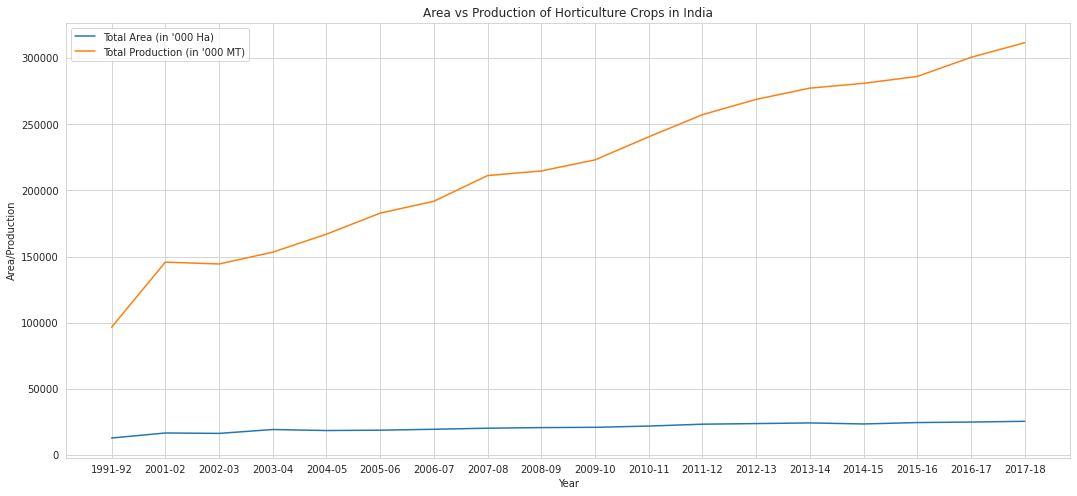

In [9]:
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
plt.title( "Area vs Production of Horticulture Crops in India" )
sns.lineplot(data=my_data["Total_A"], label="Total Area (in '000 Ha)")
sns.lineplot(data=my_data['Total_P'], label ="Total Production (in '000 MT)")
plt.xlabel("Year")
plt.ylabel("Area/Production")

We see that the area under cultivation has not changed as much compared to the growth in production. This may be due to enhanced farming technology or more efficient farming techniques overall. Lesser growth in area under cultivation means there must be tremendous increase in productivity.

# Productivity Trend 
## Let's see a plot to check our above statement.

In [10]:
# Total productivity over the years
my_data.loc[:,'Total_Pdy']

Year
1991-92     7.56
2001-02     8.79
2002-03     8.87
2003-04     7.98
2004-05     9.05
2005-06     9.77
2006-07     9.89
2007-08    10.45
2008-09    10.39
2009-10    10.69
2010-11    11.02
2011-12    11.07
2012-13    11.35
2013-14    11.46
2014-15    12.00
2015-16    11.69
2016-17    12.10
2017-18    12.25
Name: Total_Pdy, dtype: float64

**Lets plot it**

Text(0, 0.5, 'Total Productivity (MT/Ha)')

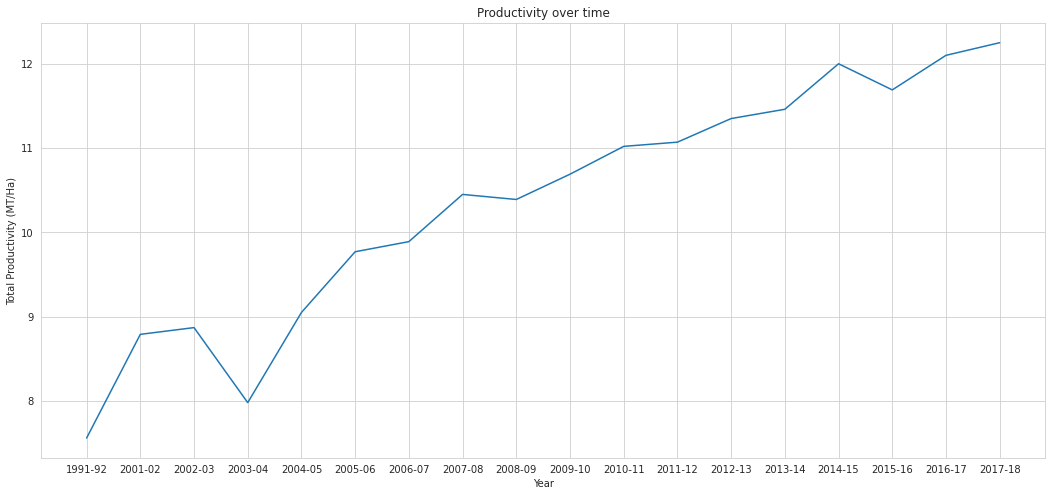

In [11]:
plt.figure(figsize=(18,8))
plt.title("Productivity over time")
sns.lineplot(data=my_data['Total_Pdy'])
plt.ylabel('Total Productivity (MT/Ha)')

We can see from the plot that productivity has increased to over 12 MT/Ha from below 8 MT/Ha in nearly three decades 

# Production trend of each crop 

In [12]:
my_data.columns

Index(['Fruits_A', 'Fruits_P', 'Fruits_Pdy', 'Veg_A', 'Veg_P', 'Veg_Pdy',
       'FAM_A', 'FAM_P', 'FAM_Pdy', 'Plantation_Crops_A', 'Plantation_Crops_P',
       'Plantation_Crops_Pdy', 'Spices_A', 'Spices_P', 'Spices_Pdy', 'Total_A',
       'Total_P', 'Total_Pdy'],
      dtype='object')

Text(0, 0.5, "Production in '000 MT'")

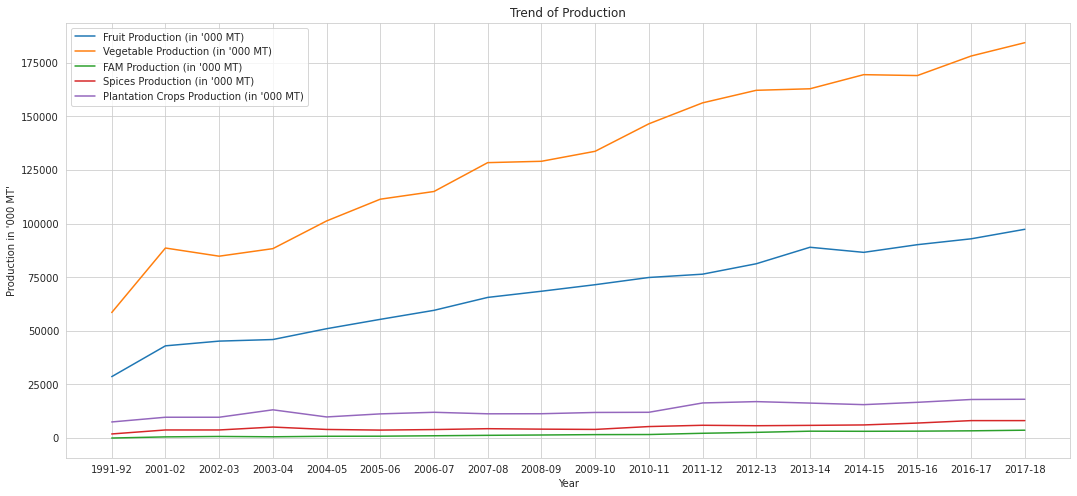

In [13]:
plt.figure(figsize=(18,8))
plt.title("Trend of Production")
sns.lineplot(data=my_data['Fruits_P'], label ="Fruit Production (in '000 MT)")
sns.lineplot(data=my_data['Veg_P'], label ="Vegetable Production (in '000 MT)")
sns.lineplot(data=my_data['FAM_P'], label ="FAM Production (in '000 MT)")
sns.lineplot(data=my_data['Spices_P'], label ="Spices Production (in '000 MT)")
sns.lineplot(data=my_data['Plantation_Crops_P'], label ="Plantation Crops Production (in '000 MT)")
plt.ylabel("Production in '000 MT'")

It is clear from the graph that vegetables makes the largest chunk of total production. Also, there has been roughly a linear increase in the production of each crop.

# Let's see a comparitive analysis of area and production stats over last two decades 

* Note: We have only 8 years data for the last decade i.e., till 2018

### Comparing total production

In [14]:
# Find out total production for the two decades
dec1_total = round(my_data.loc['2001-02': '2009-10', 'Total_P'].sum()/10**3,2) # for the 1st decade
print("Total Production during 2001-2010 was: {} billion MT \n".format(dec1_total))

dec2_total = round(my_data.loc['2010-11':, 'Total_P'].sum()/ 10**3,2) # for the 2nd decade
print("Total Production during 2011-2018 was: {} billion MT \n".format(dec2_total))

pct_change = ((dec2_total - dec1_total)/dec1_total)*100
print("Total Production increased by {}%".format(round(pct_change)))

Total Production during 2001-2010 was: 1634.08 billion MT 

Total Production during 2011-2018 was: 2223.54 billion MT 

Total Production increased by 36%


### Comparing total area under cultivation

In [15]:
# Calculate total area under cultivation during the 1st decade
dec1_area = round(my_data.loc['2001-02': '2009-10', 'Total_A'].sum()/1000, 2)
print("Total area cultivated during 2001-10 was: {} milion Ha \n".format(dec1_area))

dec2_area = round(my_data.loc['2010-11':, 'Total_A'].sum()/1000,2)
print("Total area cultivated during 2011-18 was: {} million Ha \n".format(dec2_area))

pct_change = ((dec2_area - dec1_area)/dec1_area)*100
print("Total area under cultivation increased by {}%".format(round(pct_change)))

Total area cultivated during 2001-10 was: 170.36 milion Ha 

Total area cultivated during 2011-18 was: 191.12 million Ha 

Total area under cultivation increased by 12%


Text(1, 0, 'Only 8 years data available for 2nd decade')

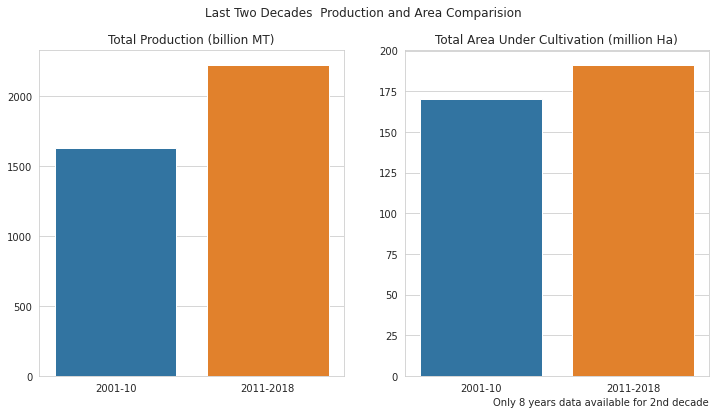

In [16]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
fig.suptitle('Last Two Decades  Production and Area Comparision')
ax[0].ticklabel_format(style='plain')
ax[0].set_title("Total Production (billion MT)")
sns.barplot(ax = ax[0], y= [dec1_total, dec2_total], 
            x = ["2001-10", "2011-2018"])

ax[1].set_title("Total Area Under Cultivation (million Ha)")
sns.barplot(ax = ax[1], y= [dec1_area, dec2_area], 
            x = ["2001-10", "2011-2018"])
plt.xlabel("Only 8 years data available for 2nd decade", loc = "right")


We can see that 8 years production has beat the previous entire decade's production - a 36% increase, whearas area under cultivation has increased by 12%. 

As seen in the productivity trend we can say that increase in productivity has been the key driver production increase. Lets get a deeper insight into the productivity:

### Comapring mean productivity

In [17]:
# Calculate mean productivity during the 1st decade
dec1_pdy = round(my_data.loc['2001-02': '2009-10', 'Total_Pdy'].mean(), 2)
print("Mean productivity during 2001-10 was: {} MT/Ha \n".format(dec1_pdy))

# Calculate mean productivity during the 2nd decade
dec2_pdy = round(my_data.loc['2010-11':, 'Total_Pdy'].mean(), 2)
print("Mean productivity during 2011-18 was: {} MT/Ha".format(dec2_pdy))

Mean productivity during 2001-10 was: 9.54 MT/Ha 

Mean productivity during 2011-18 was: 11.62 MT/Ha


Mean productivity has increased by about 2 MT/Ha